In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
data_dir = '/content/drive/My Drive/train'  # Adjust the path as necessary

In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    for label in ['dogs', 'cats']:
        label_dir = os.path.join(data_dir, label)
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg'):
                img_path = os.path.join(label_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (128, 128))  # Resize to a standard size
                images.append(img)
                labels.append(0 if label == 'dogs' else 1)
    return np.array(images), np.array(labels)

In [ ]:
# Load the data
images, labels = load_data(data_dir)

# Function to extract HOG features
def extract_hog_features(images):
    hog = cv2.HOGDescriptor()
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hog_features = hog.compute(gray)
        features.append(hog_features.flatten())
    return np.array(features)

In [ ]:
# Extract HOG features
features = extract_hog_features(images)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [4]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 65.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        61
           1       0.61      0.68      0.64        50

    accuracy                           0.66       111
   macro avg       0.66      0.66      0.66       111
weighted avg       0.66      0.66      0.66       111



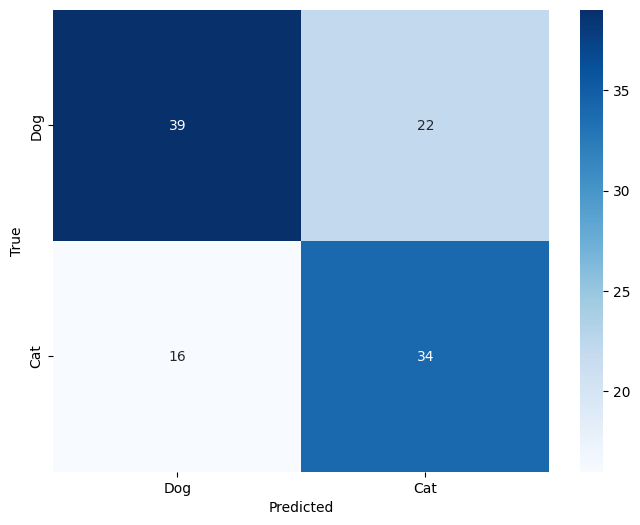

In [9]:
# Assuming y_test and y_pred are your true and predicted labels respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Dog', 'Cat'], yticklabels=['Dog', 'Cat'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()